Imports

In [1]:
import sys
sys.path.append("..")
sys.path.append("../src")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.infra.io import load_dataset
from src.nlp.preprocess import clean_text
from src.ml.training import train_and_save_model
from src.ml.inference import predict


Charger le dataset

In [2]:
df = load_dataset()
df.head()


,text,label
0,Wall Street stocks rose today after the Federa...,business
1,Apple releases new iPhone model with advanced ...,sci_tech
2,Liverpool wins Premier League title after hist...,sports
3,UN security council meets to discuss escalatin...,world
4,NASA prepares new mission to explore Mars atmo...,sci_tech


Nettoyage du texte

In [3]:
df["clean_text"] = df["text"].apply(clean_text)
df[["text", "clean_text", "label"]].head()


,text,clean_text,label
0,Wall Street stocks rose today after the Federa...,wall street stocks rose today after the federa...,business
1,Apple releases new iPhone model with advanced ...,apple releases new iphone model with advanced ...,sci_tech
2,Liverpool wins Premier League title after hist...,liverpool wins premier league title after hist...,sports
3,UN security council meets to discuss escalatin...,un security council meets to discuss escalatin...,world
4,NASA prepares new mission to explore Mars atmo...,nasa prepares new mission to explore mars atmo...,sci_tech


Visualisation des catégories

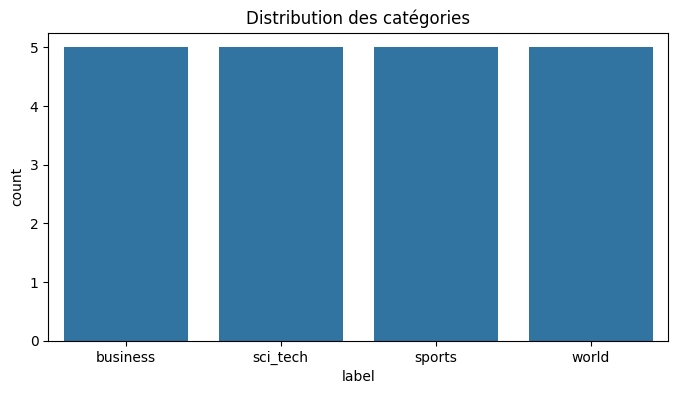

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="label")
plt.title("Distribution des catégories")
plt.show()


Entraîner le modèle depuis notebook

In [5]:
train_and_save_model()


🔄 Training SmartNews model...
✅ Training finished. Evaluation report:
              precision    recall  f1-score   support

    business       1.00      1.00      1.00         1
    sci_tech       1.00      1.00      1.00         1
      sports       0.50      1.00      0.67         1
       world       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.62      0.75      0.67         4
weighted avg       0.62      0.75      0.67         4

💾 Model saved to: /home/ines-amirat/Documents/SmartNews/models/model.joblib


/home/ines-amirat/Documents/SmartNews/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ines-amirat/Documents/SmartNews/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ines-amirat/Documents/SmartNews/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

Tester une prédiction

In [6]:
text = "The government approved new economic reforms today."
print("Texte:", text)
print("Label prédit:", predict(text))


Texte: The government approved new economic reforms today.
Label prédit: business
